<a href="https://colab.research.google.com/github/rddiasbk/Projetto-M5---An-lise-de-Cota-Parlamentar/blob/main/projeto5_grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Briefing**


O objetivo do projeto é investigar os gastos dos parlamentares brasileiros nos anos de 2019, 2020 e 2021. 

Para isso, foi utilizado o conjunto de dados sobre a Cota para o Exercício da Atividade Parlamentar, a CEAP. Em resumo, a CEAP pode ser definida como: “cota única mensal destinada a custear os gastos dos deputados exclusivamente vinculados ao exercício da atividade parlamentar.” Essa ajuda de custo para os nossos digníssimos representantes podem cobrir despesas com alimentação, transporte, hospedagem, consultoria técnica, combustíveis e entre outras.

A CEAP é regida por uma série de regras. Há algumas iniciativas, como o Serenata de Amor, que visam acompanhar
os gastos realizados pelos nossos políticos e podem ser utilizadas para
auxiliar na geração de insights.


## **01. Importação de bibliotecas**

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 02. **Limpeza e tratamento de dados**

  > **Importação de Datasets**

In [44]:
dados_2019 = pd.read_csv('/content/Ano-2019.csv', sep = ';')

FileNotFoundError: ignored

  > **Concatenando os Datasets**

In [ ]:
dados_concat = pd.concat([dados_2019,dados_2020,dados_2021])

In [ ]:
dados_ceap1 = dados_concat.copy()

In [ ]:
dados_ceap1.drop(['cpf', 'ideCadastro','txtDescricaoEspecificacao','nuCarteiraParlamentar','nuLegislatura','codLegislatura','numSubCota','numEspecificacaoSubCota','txtCNPJCPF', 'txtNumero','numParcela','numLote','nuDeputadoId', 'ideDocumento','urlDocumento'],axis='columns', inplace = True)

>Dicionário dos Dados

- **NomeParlamentar** (txNomeParlamentar) : Nome adotado pelo Parlamentar ao tomar posse do seu mandato. 
-**UF** (sgUF) : Unidade da federação pela qual o deputado foi eleito e é utilizada para definir o valor da cota a que o deputado tem.
-**Partido** (sgPartido) : Sigla do Partido
-**TipoDespesa** (txtDescricao) : descrição do Tipo de Despesa.
-**EspecificacaoDespesa** (numEspecificacaoSubCota) : Número da Especificação mais detalhada do Tipo de Despesa.
- **Fornecedor** (txtFornecedor):O conteúdo deste dado representa o nome do fornecedor do produto ou serviço presente no documento fiscal.
-**TipoDocumento** (indTipoDocumento) : Indicativo de Tipo de Documento Fiscal - 0 (Zero), para Nota Fiscal 1 (um), para Recibo; e 2, para Despesa no Exterior.
-**DataEmissao** (datEmissao) : data de emissão do documento fiscal ou a data do documento que tenha dado causa à despesa.
-**ValorDocumento** (vlrDocumento) : Valor do Documento.valor de face do documento fiscal ou o valor do documento que deu causa à despesa. Quando se tratar de bilhete aéreo, esse valor poderá ser negativo, significando que o referido bilhete é um bilhete de compensação, pois compensa um outro bilhete emitido e não utilizado pelo deputado
-**ValorGlosa** (vlrGlosa) : valor da glosa do documento fiscal que incidirá sobre o Valor do Documento, ou o valor da glosa do documento que deu causa à despesa.
-**ValorLiquido**(vlrLiquido) : valor líquido do documento fiscal ou do documento que deu causa à despesa e será calculado pela diferença entre o Valor do Documento e o Valor da Glosa. É este valor que será debitado da cota do deputado. Caso o débito seja do Tipo Telefonia e o valor seja igual a zero, significa que a despesa foi franqueada.
-**Mes** (numMes) : Mês da competência financeira do documento fiscal ou do documento que deu causa à despesa. É utilizado, junto com o ano, para determinar em que período o débito gerará efeito financeiro sobre a cota.
-**Ano**(numAno) : Ano da competência financeira do documento fiscal ou do documento que deu causa à despesa. É utilizado, junto com o mês, para determinar em que período o débito gerará efeito financeiro sobre a cota.
-**NomePassageiro**(txtPassageiro) : nome do passageiro, quando o documento que deu causa à despesa se tratar de emissão de bilhete aéreo.
-**Trecho**(txtTrecho) : trecho da viagem, quando o documento que deu causa à despesa se tratar de emissão de bilhete aéreo.
-**IdRessarcimento** (numRessarcimento) : indica o ressarcimento do qual o documento fez parte por ocasião do processamento do seu reembolso. Este dado, juntamente com o Número do Ressarcimento, auxilia a localização do documento no Arquivo da Casa.
-**Restituicao**(vlrRestituicao) :  valor restituído do documento fiscal que incidirá sobre o Valor do Documento.


> Análise de objetos

In [ ]:
dados_ceap1.head()

In [ ]:
dados_ceap1.shape

In [ ]:
dados_ceap1.dtypes

In [ ]:
(dados_ceap1.isnull().sum() / dados_ceap1.shape[0]).sort_values(ascending=False) # Cálculo do percentual de dados faltantes por coluna

In [ ]:
dados_ceap1.describe().T

> Substituições

Ajuste de hora e ano

In [ ]:
dados_ceap1['datEmissao'] = pd.to_datetime(dados_ceap1['datEmissao'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%m-%Y')

In [ ]:
dados_ceap_int = dados_ceap1['numAno'].astype('float').astype('Int64')

In [ ]:
dados_ceap = dados_ceap1.rename(columns={'txNomeParlamentar': 'NomeParlamentar', 'sgUF':'UF', 'sgPartido':'Partido', 'txtDescricao':'TipoDespesa', 'txtFornecedor': 'Fornecedor','numEspecificacaoSubCota':'EspecificacaoDespesa', 'indTipoDocumento':'TipoDocumento', 'datEmissao':'DataEmissao', 'vlrDocumento':'ValorDocumento', 'vlrGlosa':'ValorGlosa', 'vlrLiquido':'ValorLiquido', 'numMes':'Mes', 'numAno':'Ano', 'txtPassageiro':'NomePassageiro','txtTrecho':'Trecho','numRessarcimento':'IdRessarcimento','vlrRestituicao' : 'Restituicao'})
dados_ceap.head()

Substituindo Valores

In [ ]:
dados_ceap['Partido']= dados_ceap['Partido'].replace(r'\bPATRI\b','PATRIOTA',regex = True)

> Tratando Dados Ausentes

In [ ]:
dados_ceap.isnull().sum().sum() # vlr total de dados ausentes no dataset

In [ ]:
dados_ceap.isnull().sum() # qtd de dados ausentes por coluna

In [ ]:
# fiz um filtro pegando da coluna 'nome parlamentar' somente os lideres de partido na camara, e verificando  usando o isnull().sum() dentro dessa seleção,
# é possível que a maioria dos dados faltantes do dataset encontram-se aqui.
# já identifiquei quem sao os lideres de partido e farei a substituição da nomenclatura lider pelo seu respectivo parlamentar e completarei as
# as colunas respectivas com as informações corretas. (Carla) 
lideres = dados_ceap[dados_ceap['NomeParlamentar'].str.contains('LID')]
lideres.head()

In [ ]:
(lideres.isnull().sum() / lideres.shape[0]).sort_values(ascending=False) 

In [ ]:
lideres.isnull().sum() 

In [ ]:
dados_ceap = dados_ceap[dados_ceap.NomeParlamentar.str.startswith('LID') == False]
dados_ceap

## 03. Organização

## **Questão 1**

>### Como se comportam os gastos com cotas parlamentares ao longo do tempo? Existe alguma tendência de aumento ou redução desse custo?

Estrutura de desenvolvimento sugerida:

- Separar dados de gastos, mantendo parlamentares, ano, Número da especificação subcota.
- Num do mes, valor liquido < a analise pode ser feita de forma anual e mensal

Podemos ver a seguir a media dos gastos de  cada ano  de cada partido.

In [ ]:
#codigo que a carla me ajudou para ver as tendencias de gastos
tendencia = pd.crosstab(dados_ceap['Partido'],dados_ceap['Ano'],aggfunc = 'sum',values = dados_ceap['ValorLiquido'])
tendencia

No grafico é possivel ter um noção de que a media dos gastos tem um tendencia a queda.

In [ ]:
#grafico da 1
plt.figure(figsize=(15,5))
sns.barplot(data=tendencia,palette='Blues_d')
plt.title('Tendencia da media de gastos')
sns.set_theme(style="whitegrid")
plt.ylabel('Valor em Reais (R$)')
plt.show()

## **Questão 2**

>### Qual a média de gastos por parlamentar?

Estrutura de desenvolvimento sugerida:

- Seleção de nomes de parlamentar, ano, valor liquido, mes.
- Organizar e concatenar
- criar_variavel.mean()



In [ ]:
#  RESPOSTA DA QUESTÃO 2
#Media de gastos por parlamentar 
#Seleção de nomes de parlamentar, Partido,ano, valor liquido.
media_gastos_parlamentar = dados_ceap.groupby(['NomeParlamentar','Partido','Ano'])[['ValorLiquido']].mean().sort_values(by='ValorLiquido',ascending=False).reset_index()
media_gastos_parlamentar

As  5 maiores medias dos gastos dos  parlamenteres,nota-se que a maioria se deu no ano de 2019.

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data= media_gastos_parlamentar.head(),x='NomeParlamentar',y='ValorLiquido',hue='Ano',ci="sd")
sns.set_theme(style='whitegrid')
plt.xlabel('Nome do Parlamentar')
plt.ylabel('Valor em Reais (R$)')
plt.show()

## **Questão 3**

>### Quais foram os parlamentares que mais e que menos consumiram recursos?

Estrutura de desenvolvimento sugerida:

- Seleção de nomes de parlamentar, ano, valor liquido, mes.
- Organizar e concatenar
- ordenar uma lista e utilizar head() e tail()

Podemos ver a seguir a media dos gastos de  cada ano  de cada partido.

In [ ]:
m = dados_ceap[['NomeParlamentar','Partido','Ano','ValorLiquido']]
m['Ano'] = m['Ano'].astype(str)
m

organizando ordenando pelo valor do maior para o menor.

In [ ]:
#SOMA DE TODOS OS GASTOS
soma_par = m.groupby(['NomeParlamentar']).sum().sort_values(by='ValorLiquido',ascending=False).reset_index()
soma_par

In [ ]:
#SOMA DOS QUE MAIS GASTARAM POR ANO
soma_par_ano = m.groupby(['NomeParlamentar','Partido','Ano']).sum().sort_values(by='ValorLiquido',ascending=False).reset_index()
soma_par_ano

Grafico dos 5 parlamentares que mais gastaram.

In [ ]:
soma_par.head()

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data= soma_par.head(),x='NomeParlamentar',y='ValorLiquido')
sns.set_theme(style='whitegrid')
plt.xlabel('Nome do Parlamentar')
plt.ylabel('Valor em Reais (R$)')
plt.show()

Usando a soma por ano.

In [ ]:
soma_par_ano.head(10)

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data= soma_par_ano.head(),x='NomeParlamentar',y='ValorLiquido',hue = 'Ano')
sns.set_theme(style='whitegrid')
plt.xlabel('Nome do Parlamentar')
plt.ylabel('Valor em Reais (R$)')
plt.show()

Grafico dos 5 parlamentares que menos gastaram

In [ ]:
soma_par.tail()

No grafico existem valores do Mandeta e Lucina Santos são tão proximos de 0 e a distancia dos outros valores é tão grande que a barra praticamente  não aparece.

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data= soma_par.tail(),x='NomeParlamentar',y='ValorLiquido',hue = 'ValorLiquido')
sns.set_theme(style='whitegrid')
plt.xlabel('Nome do Parlamentar')
plt.ylabel('Valor em Reais (R$)')
plt.show()

Os menores valores so que por ano.

In [ ]:
soma_par_ano.tail()

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data= soma_par_ano.tail(),x='NomeParlamentar',y='ValorLiquido')
sns.set_theme(style='whitegrid')
plt.xlabel('Nome do Parlamentar')
plt.ylabel('Valor em Reais (R$)')
plt.show()

## **Questão 4**

>###  Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?

Estrutura de Desenvolvimento:

- Filtragem da cota e da despesa para saber a qual correspondente e o nome do parlamentar 
- Filtragem somada à soma dos gastos.

In [ ]:
dados_concat_3 = pd.concat([dados_2019,dados_2020,dados_2021])
dados_concat_3 = dados_concat.copy()
dados_concat_3 = dados_concat_3.rename(columns={'txNomeParlamentar': 'NomeParlamentar', 
                                        'sgUF':'UF', 'sgPartido':'Partido',
                                        'txtDescricao':'TipoDespesa', 
                                        'txtFornecedor': 'Fornecedor',
                                        'numEspecificacaoSubCota':'EspecificacaoDespesa',
                                        'indTipoDocumento':'TipoDocumento', 
                                        'datEmissao':'DataEmissao', 
                                        'vlrDocumento':'ValorDocumento',
                                        'vlrGlosa':'ValorGlosa', 
                                        'vlrLiquido':'ValorLiquido', 
                                        'numMes':'Mes', 'numAno':'Ano', 
                                        'txtPassageiro':'NomePassageiro',
                                        'txtTrecho':'Trecho',
                                        'numRessarcimento':'IdRessarcimento',
                                        'vlrRestituicao' : 'Restituicao'})
dados_concat_3['DataEmissao'] = pd.to_datetime(dados_concat_3['DataEmissao'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%m-%Y')


In [ ]:
desc = dados_concat_3[['numSubCota','TipoDespesa']]
desc.drop_duplicates().sort_values(by ='numSubCota') # VISUALIZAÇÃO de subcota e respectiva descrição

In [ ]:
gasto_cota_grup = dados_concat_3.groupby(['numSubCota', 'TipoDespesa',]).agg({'ValorLiquido':sum}) 
gasto_cota_grup = gasto_cota_grup.sort_values(by = 'ValorLiquido', ascending = False)
#Somei pelo valor da cota ressarcida(valor liquido) e mantive a visualização do valor total dos documentos


In [ ]:
gasto_por_cota = gasto_cota_grup.reset_index().head(5)

Gráfico de barras:

In [ ]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
f,ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
sns.barplot(y="TipoDespesa", x="ValorLiquido", palette = 'mako', data=gasto_por_cota, ax=ax)

## **Questão 5**

>###  Quais são os trechos de viagem mais recorrentes entre as despesas de viagem?

Estrutura de desenvolvimento sugerida:

-  analisar a frequencia de txtTrecho 
- ordenar e utilizar count

In [ ]:
viagens = dados_ceap.Trecho.dropna()

In [ ]:
trechos_viajados = pd.DataFrame(viagens.value_counts().head(5))
trechos_viajados.reset_index(inplace = True)

O trecho mais recorrente foi o de BSB/BSB

In [ ]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
plt.title('Principais trechos de viagens aéreas')
sns.barplot(x= 'index', y ='Trecho',palette = 'mako', data=trechos_viajados)

**Extra:** Os 5 políticos que mais viajaram no trecho BSB/BSB.
Resultado: 
1.   João Henrique Campos
2.   Joice Hasselmann
3.   Arthur Lira
4.   David Soares
5.   Dionilso Marcon

In [ ]:
#Os 5 políticos que mais utilizaram o voo 
filtro_bsb = dados_ceap[(dados_ceap['Trecho'] == 'BSB/BSB')]
grupo = filtro_bsb[['Trecho','DataEmissao','cpf','NomePassageiro','Partido','ValorLiquido']]
grupo2 = grupo.groupby(['NomePassageiro','Partido', 'Trecho']).agg({'ValorLiquido': sum}).sort_values('ValorLiquido', ascending = False)
cinco_maiores_gastos = grupo2.head(5).reset_index()
cinco_maiores_gastos

Gráfico de Barras

In [ ]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
plt.title('05 maiores gastos no trecho BSB/BSB')
sns.barplot(x = 'Partido',y = 'ValorLiquido', hue = 'NomePassageiro', palette = "mako", data = cinco_maiores_gastos,)

## **Questão 6**

>###  Qual a média de gastos por Estado?

Estrutura de desenvolvimento: 

- Filtro e visualização da UF + Despesa e Valor
- Agrupamento da UF e o tipo de Despesa com a Soma dos valores
- Visualização da maior média, a despesa e o estado.


In [ ]:
gasto_UF = dados_concat_3[['UF','ValorLiquido']].groupby('UF')
media_por_estado = gasto_UF.mean().sort_values(by='ValorLiquido', ascending = False) #FILTRA os dados por estado etc
media_por_estado

In [ ]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
plt.title('Média de Gastos por Unidade Federativa')
sns.barplot(x=media_por_estado.index, y = 'ValorLiquido',palette = 'mako', data = media_por_estado)

**Extra:** A média de gastos de cada estado por classificado pelo *tipo de despesa*.
>   Como os gastos acabaram diluidos entre os diversos tipos de gastos e notas optei por agrupar e conferir os estados possuíam maior média de gastos e em quais despesa se concentravam.


>   Os gastos maiores foram de Locação de Aeronaves e Consultorias. A maior parte de estados da região Norte. Talvez explique-se pela conhecida dificuldade de locomoção nas rodovias e hidrovias da Região Norte.

In [ ]:
gasto_UF2 = dados_concat_3.groupby(['UF', 'numSubCota','TipoDespesa']).agg({'ValorLiquido':'mean'})
media_por_estado_despesa = gasto_UF2.sort_values(by = 'ValorLiquido', ascending = False).head(5).reset_index()
#organizar os valores valores e a maior média.
media_por_estado_despesa

Gráfico de barras: 

In [ ]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
plt.title('Média de gasto X Tipo de Despesa')
sns.barplot(x= 'UF', y = 'ValorLiquido', hue = 'TipoDespesa', palette = 'mako', data = media_por_estado_despesa)

## **Questão 7**

>###  Qual é o valor total de gastos por Estado?

Estrutura de desenvolvimento sugerida:

- Tipos de gastos e UF
- Somar os gastos por federação e ordenar lista

In [ ]:
dados_ceap_uf= dados_ceap.filter(['UF', 'ValorLiquido'], axis=1).groupby(['UF']).sum()
dados_ceap_uf

In [ ]:
dados_ceap_valoruf = dados_ceap_uf.sort_values(['ValorLiquido'], ascending=False)
dados_ceap_valoruf

Os estados que possuem maior gastos: 
- SP	
- MG	
- BA	
- RJ	
- PR

In [ ]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
# sns.set_theme(style="whitegrid")

# palette="Blues_d" -> Colocar dentro do gráfico para mudar o esquema de cores das barras.
sns.barplot(y=dados_ceap_valoruf.index, x="ValorLiquido" ,data=dados_ceap_valoruf)

## **Questão 8**

>###  Quais Estados têm maior número de representantes?



Estrutura de desenvolvimento sugerida:
- separar nome de representantes por UF
- count por UF

In [ ]:
dados_ceap_parlamentar = dados_ceap[['UF', 'NomeParlamentar']].drop_duplicates().copy()
dados_ceap_parlamentar

In [ ]:
dados_ceap_parlamentarcount = dados_ceap_parlamentar.groupby(['UF']).count().sort_values(['NomeParlamentar'], ascending=False)
dados_ceap_parlamentarcount 

In [ ]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(y=dados_ceap_parlamentarcount.index, x="NomeParlamentar" ,data=dados_ceap_parlamentarcount)

As unidades federativas que mais possuem parlamentares são: 
- SP
- RJ
- MG
- BA
- RS


## **Questão 9**

>###  Há alguma correlação entre a quantidade de parlamentares por estado e o valor total dos gastos?

Estrutura de desenvolvimento sugerida:

- UF, utilizar a variavel da questao 8 de count por UF, total de gastos
- calculo da correlação

In [ ]:
dadosParlamentar_ceap = dados_ceap_parlamentarcount.copy()

In [ ]:
valorLiquidoTotalUf = dados_ceap_valoruf.copy()

In [ ]:
corr_gasto_parlamentar_uf = dadosParlamentar_ceap.merge(valorLiquidoTotalUf, how='inner', left_on='UF', right_on='UF')
corr_gasto_parlamentar_uf

In [ ]:
corr_gasto_parlamentar_uf.corr()

A correlação entre quantidade de parlamentares por estados é proporcional aos valores líquidos abatidos das cotas mensais.

É interessante observar que esse cálculo se faz necessário dentro do contexto, pois a distancia entre eles demonstraria uma possível alerta de fraude onde as despesas não estariam sendo apresentadas de forma correta.

In [ ]:
# corr_gasto_parlamentar_uf.plot.scatter(x='NomeParlamentar',y='ValorLiquido', c='Red')
sns.regplot(corr_gasto_parlamentar_uf['NomeParlamentar'], corr_gasto_parlamentar_uf['ValorLiquido'] )

## **Questão 10** 

>### Qual a média de gastos por partido?


- Selecionei as colunas `'Partido'` e `'Valor Líquido'` do Dataset original;

- Para calcular a média dos valores utilizei a função `.mean()` agrupando o resultado por Partido com o `.groupby()` ;

- Com o método `.sort_values()` ordenei pelos valores da coluna `'Valor Liquido', de forma decrescente `(ascending = False)`;

- E com a função `.round()` fiz o arredondadento dos valores para duas casas decimais.

In [ ]:
media_gasto_partido_total= dados_ceap[['Partido','ValorLiquido']].groupby('Partido').mean().sort_values('ValorLiquido', ascending=False).round(2).reset_index()
media_gasto_partido_total.head()

>Os Partidos que não possuem registro de gastos nos anos de 2020 e 2021 foram incorporados a outros partidos ou tiveram alteração na nomenclatura no ano de 2019 conforme abaixo:

- mudança da denominação do Partido da República (PR) para Partido Liberal (PL) em 07/05/2019

- Fusão do Partido Humanista da Solidariedade (PHS) ao Podemos em 19/07/2019

- a incorporação do Partido Pátria Livre (PPL) ao Partido Comunista do Brasil (PCdoB) em 28/05/2019

- mudança do nome do Partido Popular Socialista (PPS) para Cidadania em 19/09/2019

- mudança de nome do PRB (Partido Republicano Brasileiro) para Republicanos em 15/08/2019

In [ ]:
media_gasto_partido_total.boxplot(vert=False,figsize = (16,8))

><font color='orange' style='font-size: 50px;'>**Resultado da Análise**

A média geral dos gastos foi de 952,48 reais,com a mediana no valor de 890,46 e apresentou apenas três outliers:

- O Partido PPL apresentou a maior média por não haver registro de gastos nos anos de 2020 e 2021 pois foi incorporado  ao Partido Comunista do Brasil (PCdoB) em 28/05/2019.

- S.PART também apresentou uma média muito alta pois nesse grupo só há um Parlamentar, o Deputado Federal licenciado Rodrigo Maia.Apesar de ter sido filiado ao Democratas até 13/06/2021, data que antecedeu à sua expulsão do Partido, só há registro de gastos no mês de janeiro de 2019.

- O Partido NOVO apresentou a menor média,monstrando que seus Parlamentares vem seguindo a risca um dos príncípios do Partido, a economia de gastos públicos com o uso racional dos recursos públicos.




##**Questão 11** 

>### Quais são os partidos que mais e que menos consumiram a cota parlamentar?

><font color='orange' style='font-size: 50px;'>Cota para o Exercício da Atividade Parlamentar

<hr style='border: 2px solid red;'>

O valor máximo mensal da cota depende da unidade da federação que o deputado representa. Essa variação ocorre por causa das passagens aéreas e está relacionada ao valor do trecho entre Brasília e o Estado que o deputado representa.


|UF    |Cota Mensal  |
|------|-------------|
|AC|38433,51|
|AL|35257,42|
|AM|37518,71|
|AP|37350,51|
|BA|3592,68|
|CE|36555,69|
|DF|	26512,46|
|ES	|32226,14|
|GO	|30575,52|
|MA	|36297,29|
|MG|	31079,83|
|MS	|34911,89|
|MT|	33951,91|
|PA	|36362,53|
|PB|	36194,70|
|PE	|35888,36|
|PI|	35281,25|
|PR|33472,99|
|RJ	|30793,31|
|RN	|36796,99|
|RO	|37606,87|
|RR	|39277,46|
|RS	|35198,69|
|SC	|34339,20|
|SE|	34564,36|
|SP|	31898,60|
|TO	|34017,00|

### 1 - **Criando o Primeiro Dataframe Auxiliar** : <font color='orange' style='font-size: 50px;'>Valor da Cota por Estado



- criei uma planilha no excel com os valores das cotas e seus respectivos Estados;
- Utilizando `pd.read_excel` fiz a leitura do arquivo.


**OBS.: Os valores são referentes a soma dos três anos, de 2019 até julho de 2021**

In [ ]:
cota_total =pd.read_excel('/content/Cota_Total.xlsx', index_col=0) 
cota_total.head()

### 2 -  **Criando o Segundo DataFrame Auxiliar** : <font color='orange' style='font-size: 50px;'>Qtd de Parlamentares por Estado
 



- Selecionei as colunas 'UF', 'Partido' e 'NomeParlamentar' do DataFrame original e exclui seus valores duplicados utilizando a função `.drop_duplicates()`;
- Fiz o agrupamento `.groupby()` por 'Partido' e 'UF' e a contagem dos Parlamentares  `.count()`;
- Os valores foram ordenados `.sort_values()`em ordem decrescente `ascendig=False`;
- A coluna 'NomeParlamentar'foi renomeada `.rename()`.


In [ ]:
qtd_parlamentar_aux = dados_ceap[['UF','Partido','NomeParlamentar']].drop_duplicates().copy()
qtd_parlamentar = qtd_parlamentar_aux.groupby(['Partido','UF']).count().sort_values('NomeParlamentar',ascending = False).rename(columns={'NomeParlamentar':'Qtd.Parlamentares'})
qtd_parlamentar


### 3 - **Terceiro DataFrame Auxiliar** : <font color='orange' style='font-size: 50px;'>Junção do Primeiro com o Segundo Dataframe Auxiliares


- A junção dos dois primeiros Dataframes foi feita através da função `.join()`

In [ ]:
df_aux=cota_total.join(qtd_parlamentar)
df_aux.head()

- Criei uma nova coluna `'TotalCotaEstado` onde o valor contido nela será o valor da Cota de cada Estado multiplicado pela quantidade de Parlamentares que o representa;
- Fiz a conversão dos valores de notação científica para float `pd.options.display.float_format´` 

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
df_aux['TotalCotaEstado'] = df_aux['TotalCota'] * df_aux['Qtd.Parlamentares']
df_aux.head()

### 4 - **Criando o Quarto DataFrame Auxiliar**: <font color='orange' style='font-size: 50px;'>Total de gastos por Partido





- Criei um Dataframe com três colunas selecionadas do Dataframe original , fiz uma cópia pra que o Dataset original não fosse alterado.

- Utilizei `groupby()` para fazer o agrupamento da nova tabela por Partido e UF usei a função `.sum()` para somar os valores gastos;

**OBS: Foram considerados os valores até julho de 2021**

In [ ]:
gasto_partido_total_aux = dados_ceap[['Partido','UF','ValorLiquido']].loc[dados_ceap['Mes']<= 7].copy()
gasto_partido_total = gasto_partido_total_aux.groupby(['Partido','UF']).sum()
gasto_partido_total.fillna(0)

###<font color='orange' style='font-size: 50px;'> **DataFrame Consumo da Cota Por Partido**





- Junção do Terceiro e Quarto Dataframe Auxiliar `.join()`

In [ ]:
df_aux2 =gasto_partido_total.join(df_aux)
df_aux2

- Selecionei apenas as colunas 'ValorLiquido' e 'ValorEstado' do DataFrame gerado após a junção;
- Agrupei o resultado da soma `.sum()`por Partido;
- Criei uma nova coluna `Percentual`cujo valor será o percentual do total de gastos do Partido (ValorLiquido) em relação a Cota (TotalCotaEstado)

In [ ]:
consumo_cota_partido_aux= df_aux2[['ValorLiquido','TotalCotaEstado']]
consumo_cota_partido = consumo_cota_partido_aux.groupby(['Partido']).sum()
consumo_cota_partido['Percentual'] = ((consumo_cota_partido['ValorLiquido'] /consumo_cota_partido['TotalCotaEstado']) * 100)
consumo_cota_partido.head()

><font color='orange' style='font-size: 50px;'>**Partidos que menos utilizaram a Cota Parlamentar**</font>
<hr style='border: 2px solid red;'>

In [ ]:
partido_menor_consumo =consumo_cota_partido.sort_values('Percentual',ascending = True)
partido_menor_consumo.head(10)

In [ ]:
graf_menor_consumo = partido_menor_consumo.head(10).plot(kind='barh',figsize=(15,10))
graf_menor_consumo.set_xlabel(' Consumo',fontsize=16)
graf_menor_consumo.set_ylabel('Partido', fontsize=18)
graf_menor_consumo.set_title('Partidos que menos utilizaram a Cota Parlamentar', fontsize=18)
graf_menor_consumo = graf_menor_consumo

><font color='orange' style='font-size: 50px;'>**Resultado da Análise**

Desconsiderando os Partidos PPS, PHS, PRB,PR e PPL que fazem parte do grupo dos Partidos que foram renomeados ou incorporporados à outro Partido no ano de 2019 e por isso apresentaram consumo muito baixo, o NOVO também aparece com o menor consumo da Cota Parlamentar seguido dos Partidos REDE, PODE, PSC e PV.

><font color='orange' style='font-size: 50px;'>**Partidos que mais utilizaram a Cota Parlamentar**</font>
<hr style='border: 2px solid red;'>

In [ ]:
partido_maior_consumo =consumo_cota_partido.sort_values('Percentual',ascending = False)
partido_maior_consumo.head()

In [ ]:
graf_maior_consumo = partido_maior_consumo.head().plot(kind='barh',figsize=(15,10))
graf_maior_consumo.set_xlabel('Consumo',fontsize=16)
graf_maior_consumo.set_ylabel('Partido', fontsize=18)
graf_maior_consumo.set_title('Partidos que mais utilizaram a Cota Parlamentar', fontsize=18)
graf_maior_consumo =graf_maior_consumo

><font color='orange' style='font-size: 50px;'>**Resultado da Análise**

**Os Partidos que mais consumiram a Cota Parlamentar:**

- Republicanos 
- PL
- Cidadania
- PDT
- PSL

O PSL mesmo possuindo a maior Cota dentre os Partidos com os cinco maiores consumos, o Republicanos foi o que obteve o maior percentual.

## **Questão 12** 

>###  Há alguma correlação entre a quantidade de parlamentares por partido e o valor total dos gastos?

>### 1- **Criando o primeiro dataframe** - <font color='orange' style='font-size: 50px;'>Quantidade de Parlamentares por Partido

- Criei um dataframe com as duas colunas selecionadas do Dataframe original ´Partido'e 'NomeParlamentar' sem os valores duplicados utilizando `.drop_duplicates()`.Foi feito uma cópia `.copy()` pra que o Dataset original não fosse alterado.

- Utilizei `.groupby()` para fazer o agrupamento da nova tabela por Partido e usei `.count()` para fazer a contagem de quantos Parlamentares há em cada Partido;

- Com `.sort_values(ascending = False)` ordenei os valores em ordem decrescente e com `.rename()`renomei a coluna 'NomeParlamentar'.

In [ ]:
parlamentar_partido_aux = dados_ceap[['Partido','NomeParlamentar']].drop_duplicates().copy() 
parlamentar_partido = parlamentar_partido_aux.groupby('Partido').count().sort_values('NomeParlamentar',
    ascending = False).rename(columns={'NomeParlamentar':'Qtd.Parlamentares'}) 

parlamentar_partido.head()

>### 2 - **Criando o segundo dataframe** - <font color='orange' style='font-size: 50px;'>Valor total dos gastos por Partido

- Criei o dataframe somente com as colunas 'Partido'e 'ValorLiquido' do dataset original;
- Realizei a soma `.sum()` dos valores gastos agrupando `.groupby()`o resultado por Partido; 
- Utilizei  `.sort_values(ascending = False)` para ordenar os valores em ordem decrescente e `.rename()`para renomar a coluna 'ValorLiquido'.


In [ ]:
gasto_partido_total= dados_ceap[['Partido','ValorLiquido']].groupby('Partido').sum().sort_values('ValorLiquido', 
       ascending=False).rename(columns={'ValorLiquido':'Total Gastos'})

gasto_partido_total.head()

>### 3 -**Dataframe - <font color='orange' style='font-size: 50px;'>Correlação**

- Utilizei a função `.merge()` para fazer a junção das duas tabelas e indicando nos parâmetros a coluna 'Partido' como chave ( ponto de interseção entre as duas tabelas)

In [ ]:
corr_part_gasto = parlamentar_partido.merge(gasto_partido_total, how='inner', left_on='Partido', right_on='Partido')
corr_part_gasto.head()


>### 4 -<font color='orange' style='font-size: 50px;'>  **Cálculo do coeficiente de correlação**



- Utilizando a função `.corr()`, calculei a correlação entre os valores das colunas 'Total Gastos' e 'Qtd.Parlamentares'.

In [ ]:
corr_part_gasto ['Total Gastos'].corr(corr_part_gasto ['Qtd.Parlamentares'])

In [ ]:
grafico_corr_part_gasto = corr_part_gasto.corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(grafico_corr_part_gasto , annot=True)

plt.show()

In [ ]:
ax1 = corr_part_gasto.plot.scatter(x='Qtd.Parlamentares',y='Total Gastos', c='Red')
ax1 = ax1

In [ ]:
sns.regplot(corr_part_gasto['Qtd.Parlamentares'], corr_part_gasto['Total Gastos'])


#método *regplot* do *seaborn*, gera uma plotagem de dispersão e inclui um traço de regressão linear

><font color='orange' style='font-size: 50px;'>**Resultado da Análise**

As duas variáveis possuem uma correlação muito forte e estão diretamente correlacionadas, ou seja, à medida que a quantidade de Parlamentares aumenta, o mesmo acontece com o valor referente ao total dos gastos


##**Questão 13** 

>###  Quais são os Estados que mais e que menos consumiram a cota parlamentar?

### 1 - **Criação do primeiro dataframe auxiliar:**<font color='orange' style='font-size: 50px;'> Total de Parlamentares por Estado


- Selecionei as coluna 'UF' e 'NomeParlamentar' do dataset original e exclui os valores duplicados com `.drop_duplicates()` e fiz uma cópia `.copy()`para que o original não fosse alterado;
- Fiz a contagem dos Parlamentares usando `.count()`e agrupando os resulatdos por Estado com `.groupby()`
- Renomeei a coluna 'NomeParlamentares" usando `.rename()`

In [ ]:
qtd_parlamentar_estado_aux= dados_ceap[['UF','NomeParlamentar']].drop_duplicates().copy()
qtd_parlamentar_estado = qtd_parlamentar_estado_aux.groupby(['UF']).count().sort_values('NomeParlamentar',ascending = False).rename(columns={'NomeParlamentar':'Qtd.Parlamentares'})
qtd_parlamentar_estado.head()

### 2 - **junção dos dataframes**


- utilizando `.join()`uni o dataframe criado acima com o dataframe que possui os valores da cota mensal de cada Estado (cota_total) 

In [ ]:
vlr_total_cota = qtd_parlamentar_estado.join(cota_total)
vlr_total_cota['Vlr Total Cota'] = vlr_total_cota ['Qtd.Parlamentares']*vlr_total_cota['TotalCota']
vlr_total_cota.head()

### 3 - Criação do Dataframe <font color='orange' style='font-size: 50px;'>  Total de gastos por Partido


- Selecionei as colunas 'UF' e 'ValorLiquido' do dataset original e somei os valores `.sum()`e agrupei `.groupby()`os resultados por Estado

**OBS: Foi considerado os valores dos gastos até julho de 2021**

In [ ]:
gasto_estado_aux = dados_ceap[['UF','ValorLiquido']].loc[dados_ceap['Mes']<= 7]
gasto_estado = gasto_estado_aux.groupby(['UF']).sum()
gasto_estado.head()

###<font color='orange' style='font-size: 50px;'>  **Consumo da Cota por Estado**


- Uni os dataframes vlr_total_cota e gasto_estado usando `.join() e renomeando algumas colunas `.rename()`;
- criei a coluna '%Consumo' e o valor contido nela será o percentual de gastos em relação ao total da cota de cada Estado.

In [ ]:
consumo_cota_uf = vlr_total_cota.join(gasto_estado).rename(columns={'TotalCota':'CotaEstado','Vlr Total Cota':'TotalCota'})
consumo_cota_uf['%Consumo'] = (consumo_cota_uf['ValorLiquido']/consumo_cota_uf['TotalCota'])*100
consumo_cota_uf.head()

- CotaEstado - Valor da Cota do Estado multiplicado por 31 meses
- TotalCota - Valor da Cota do Estado multiplicado pela quantidade de Parlamentares
- Valor Liquido - Total de gastos do Estado
- %Consumo - percentual de consumo da Cota

><font color='orange' style='font-size: 50px;'>**Estados que mais utilizaram a Cota Parlamentar**</font>
<hr style='border: 2px solid red;'>

In [ ]:
estado_maior_consumo = consumo_cota_uf.sort_values('%Consumo',ascending = False)
estado_maior_consumo.head()

><font color='orange' style='font-size: 50px;'>**Resultado da Análise**

**Os Estados que mais utilizaram a Cota Parlamentar:**
- Bahia
- Sergipe
- Piauí
- Acre
- Tocantins

><font color='orange' style='font-size: 50px;'>**Estados que menos utilizaram a Cota Parlamentar**</font>
<hr style='border: 2px solid red;'>

In [ ]:
estado_menor_consumo = consumo_cota_uf.sort_values('%Consumo',ascending = True)
estado_menor_consumo.head()

> <font color='orange' style='font-size: 50px;'>**Resultado da Análise**

**Os Estados que menos utilizaram a Cota Parlamentar:**
- Santa Catarina
- Distrido Federal
- Rondônia
- Mato Grosso do Sul
- Mato Grosso

## **Questão 14**

>###  Análise de gastos no exterior durante a pandemia

Estrutura de desenvolvimento sugerida:

- Filtrar qtd de parlamentares, valor liquido , TipoDocumento e UF, Ano

In [ ]:
gastos_exterior = dados_ceap.filter([ 'NomeParlamentar','UF','NomeParlementar', 'ValorLiquido','Mes' ,'Ano', 'TipoDocumento'], axis = 1)
gastos_exterior

In [ ]:
gastos_exterior_pandemia = gastos_exterior[gastos_exterior['TipoDocumento'].isin([2])]
gastos_exterior_pandemia


In [ ]:
gastos_exterior_pandemia_2019 = gastos_exterior_pandemia[gastos_exterior_pandemia['Ano'].isin([2019])].sort_values(by='UF', ascending = False)
gastos_exterior_pandemia_2019 

In [ ]:
gastos_exterior_pandemia_2020 = gastos_exterior_pandemia[gastos_exterior_pandemia['Ano'].isin([2020])].sort_values(by='UF', ascending = False)
gastos_exterior_pandemia_2020

In [ ]:
gastos_exterior_pandemia_2021 = gastos_exterior_pandemia[gastos_exterior_pandemia['Ano'].isin([2021])].sort_values(by='UF', ascending = False)
gastos_exterior_pandemia_2021

A difereça entre uso de recursos público no exterior entre 2019 e 2021 é gritante. Porém tivemos um político que no meio de um caos sanitário viajou para a Europa.

O único parlamentar que teve gasto no exterior durante a pandemia foi o deputado federal do PSD-RJ Hugo Leal com a justificativa de uma passagem pela KLM. O que é um tanto questionável considerando as recomendações de isolamento do periodo viajado.
 
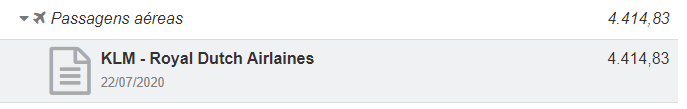

(Imagem divulgada no site do próprio deputado)

Após uma análise sobre o comportamento político do parlamentar é possível compreender o por que da atitude um tanto controversa com o período vivido. As manobras politicas através do anos o colocaram nos holofotes do senado e sua habilidade de transitar em governos de forma bem posicionada, o colocou como relator Fiscal, dando poder para esse parlamentar quanto ao uso das verbas estudadas nesse projeto. 

Apesar de ter muitas informações faltantes, é notório o quanto a verba é aplicada de forma inadequada e irresponsável.

É necessário, como cidadãos, termos uma maior presença e cobrarmos dos parlamentares que votamos o uso da verba pública como um bem que vai ser revertido, mesmo de forma indireta, para a população.


(*fonte disponível em 13.2*)

# **Fontes:**


- 13.1 https://adeusbolsonaro.com.br/rj/deputado-hugo-leal.html?2
- 13.2 https://veja.abril.com.br/politica/relator-do-orcamento-hugo-leal-ganha-poder-e-guarda-segredos-valiosos/